In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

Входные переменные (на основе физико-химических тестов):

1 - fixed acidity - большинство кислот, содержащихся в вине, либо фиксированные, либо нелетучие (испаряются с трудом)

2 - volatile acidity - количество уксусной кислоты в вине, слишком высокое содержание которой может привести к появлению неприятного уксусного привкуса

3 - citric acid - содержащаяся в небольших количествах, лимонная кислота может придать винам "свежесть" и аромат

4 - residual sugar- количество сахара, остающегося после прекращения ферментации, редко можно найти вина с содержанием менее 1 грамма на литр и

5 - chlorides - количество соли в вине

6 - free sulfur dioxide - свободная форма SO2 существует в равновесии между молекулярным SO2 (в виде растворенного газа) и бисульфит-ионом

7 - total sulfur dioxide - количество свободной и связанной форм S02

8 - density - плотность воды близка к плотности воды в зависимости от процентного содержания алкоголя и сахара.

9 - pH - описывает, насколько кислым или щелочным является вино по шкале от 0 (очень кислый) до 14 (очень щелочной); у большинства вин этот показатель находится в пределах 3-4 баллов по шкале

10 - sulphates - добавка к вину, которая может способствовать повышению уровня содержания диоксида серы (S02), который действует как антимикробное средство и

11 - alcohol

Выходная величина (на основе сенсорных данных):
12 - quality (оценка от 0 до 10)

In [29]:
df = pd.read_csv('winequality-red-missing.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,NaN,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [30]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1279.000000,1599.000000,1279.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.328538,0.527821,0.272674,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.716291,0.179060,0.195746,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.300000,0.640000,0.430000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.500000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1279 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1279 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [32]:
df.isnull().sum()

fixed acidity           320
volatile acidity          0
citric acid             320
residual sugar            0
chlorides                 0
free sulfur dioxide       0
total sulfur dioxide      0
density                   0
pH                        0
sulphates                 0
alcohol                   0
quality                   0
dtype: int64

## Работа с отсутствующими значениями

In [33]:
df['fixed acidity'].value_counts()

fixed acidity
7.1     51
7.2     50
7.8     45
7.5     45
7.7     44
        ..
13.8     1
4.7      1
5.7      1
4.6      1
5.3      1
Name: count, Length: 94, dtype: int64

In [34]:
df['fixed acidity'].mean()

8.328537920250195

In [35]:
df['fixed acidity'] = df['fixed acidity'].fillna(df['fixed acidity'].mean())

In [36]:
df.isnull().sum()

fixed acidity             0
volatile acidity          0
citric acid             320
residual sugar            0
chlorides                 0
free sulfur dioxide       0
total sulfur dioxide      0
density                   0
pH                        0
sulphates                 0
alcohol                   0
quality                   0
dtype: int64

In [37]:
df['citric acid'].value_counts()

citric acid
0.00    106
0.49     50
0.02     39
0.24     36
0.26     34
       ... 
0.62      1
0.73      1
1.00      1
0.75      1
0.78      1
Name: count, Length: 79, dtype: int64

In [38]:
df['citric acid'] = df['citric acid'].fillna(df['citric acid'].mean())

In [39]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## Группировка

In [40]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.400000,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.800000,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,8.328538,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.200000,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.400000,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Среднее количество алкоголя у вина каждого качества

In [41]:
df.groupby('quality')['alcohol'].mean()

quality
3     9.955000
4    10.265094
5     9.899706
6    10.629519
7    11.465913
8    12.094444
Name: alcohol, dtype: float64

### Максимальное количество алкоголя у вина каждого качества

In [42]:
df.groupby('quality')['alcohol'].max()

quality
3    11.0
4    13.1
5    14.9
6    14.0
7    14.0
8    14.0
Name: alcohol, dtype: float64

### Минимальное количество алкоголя у вина каждого качества

In [43]:
df.groupby('quality')['alcohol'].min()

quality
3    8.4
4    9.0
5    8.5
6    8.4
7    9.2
8    9.8
Name: alcohol, dtype: float64

### Среднее количество уксусной кислоты у вина каждого качества

In [44]:
df.groupby('quality')['volatile acidity'].mean()

quality
3    0.884500
4    0.693962
5    0.577041
6    0.497484
7    0.403920
8    0.423333
Name: volatile acidity, dtype: float64

### Максимальное количество уксусной кислоты у вина каждого качества

In [45]:
df.groupby('quality')['volatile acidity'].max()

quality
3    1.580
4    1.130
5    1.330
6    1.040
7    0.915
8    0.850
Name: volatile acidity, dtype: float64

### Найдем вино с качеством 8 и максимальным количеством уксусной кислоты

In [46]:
df.loc[(df['quality'] == 8) & 
       (df['volatile acidity'] == 0.850)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
390,5.6,0.85,0.272674,1.4,0.045,12.0,88.0,0.9924,3.56,0.82,12.9,8


### Минимальное количество уксусной кислоты у вина каждого качества

In [47]:
df.groupby('quality')['volatile acidity'].min()

quality
3    0.44
4    0.23
5    0.18
6    0.16
7    0.12
8    0.26
Name: volatile acidity, dtype: float64

### Найдем вино с качеством 8 и минимальным количеством уксусной кислоты

In [48]:
df.loc[(df['quality'] == 8) &
       (df['volatile acidity'] == 0.26)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1090,10.0,0.26,0.54,1.9,0.083,42.0,74.0,0.99451,2.98,0.63,11.8,8


## Визуализация

In [49]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.400000,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.800000,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,8.328538,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.200000,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.400000,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Количество вин каждого качества

<Axes: xlabel='quality', ylabel='count'>

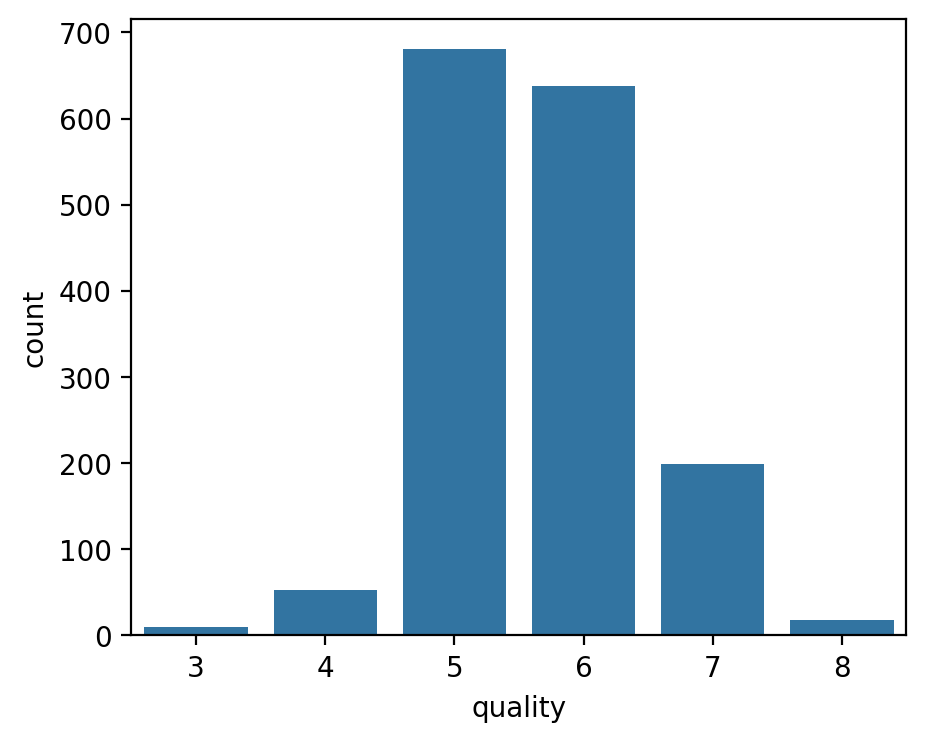

In [50]:
plt.figure(figsize=(5, 4), dpi=200)
sns.countplot(x='quality', data=df)

#### На графике видно, что в датасете больше всего вин с оценкой 5 и 6, а меньше всего вин с оценкой 3 и 8

### Содержание уксусной кислоты в зависимости от качества вина

<Axes: xlabel='quality', ylabel='volatile acidity'>

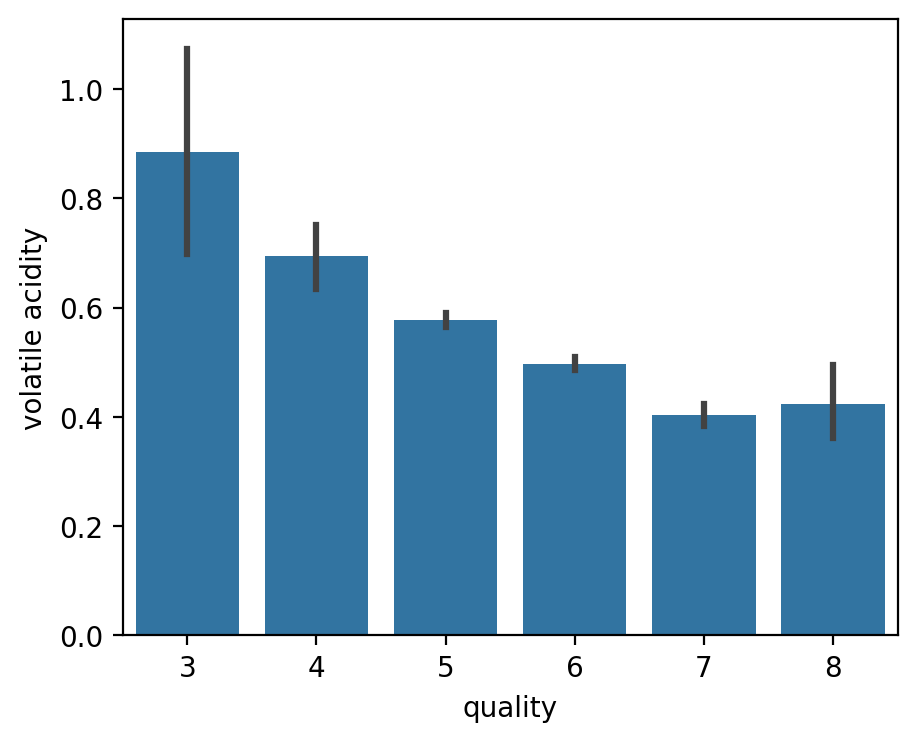

In [59]:
plt.figure(figsize=(5, 4), dpi=200)
sns.barplot(x=df['quality'], y=df['volatile acidity'])

#### На графике видно, что с увеличением качества вина, среднее содержание уксусной кислоты уменьшается, но все равно имеется погрешность, которая больше всего у вин с оценкой 3

### Содержание лимонной кислоты в зависимости от качества вина

<Axes: xlabel='quality', ylabel='citric acid'>

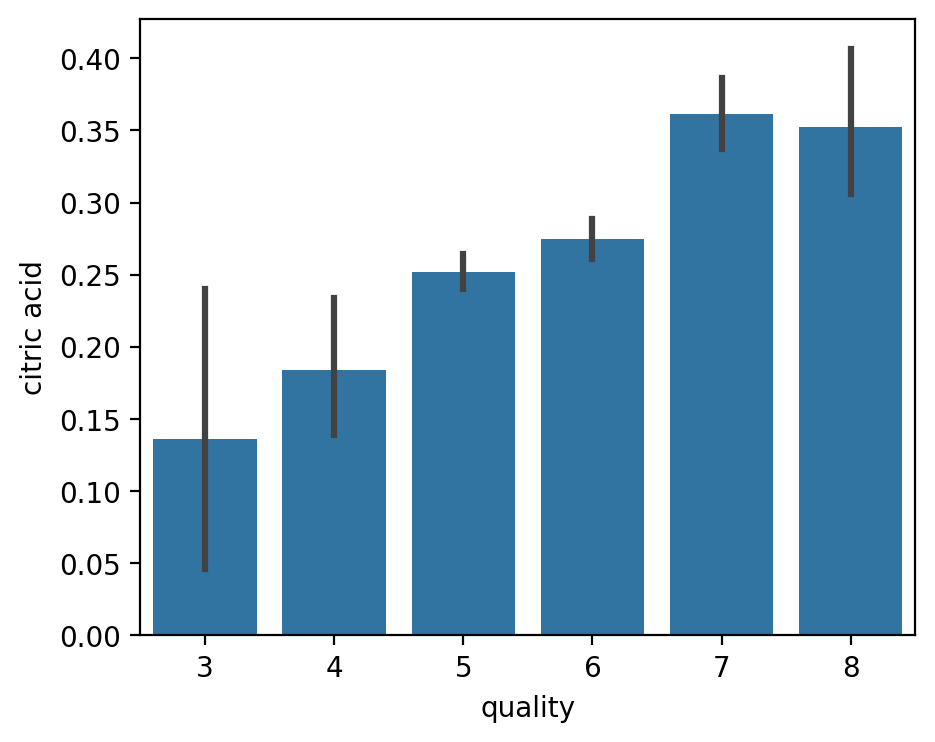

In [62]:
plt.figure(figsize=(5, 4), dpi=200)
sns.barplot(x=df['quality'], y=df['citric acid'])

#### На графике видно, что с увеличенимем качества вина, среднее содержание лимонной кислоты увеличивается. Также видно большой разброс значений вин с качеством, что может быть связано с малым количеством объектов.

### Количество оставшегося сахара после ферментации в зависимости от качества вина

<Axes: xlabel='quality', ylabel='residual sugar'>

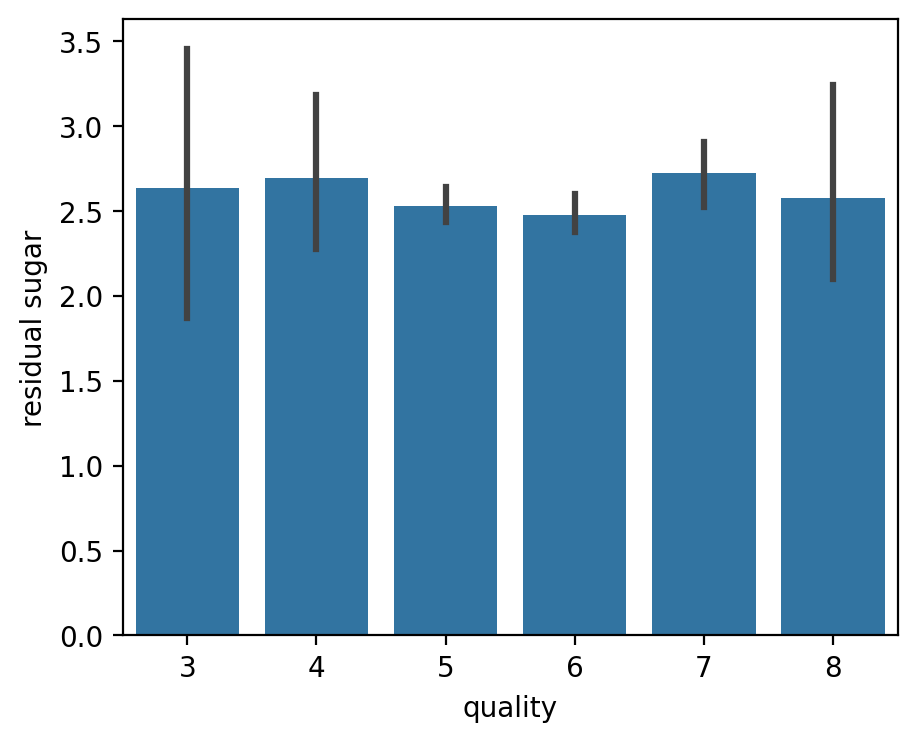

In [56]:
plt.figure(figsize=(5, 4), dpi=200)
sns.barplot(x=df['quality'], y=df['residual sugar'])

### Плотность в зависимости от качества вина

<Axes: xlabel='quality', ylabel='density'>

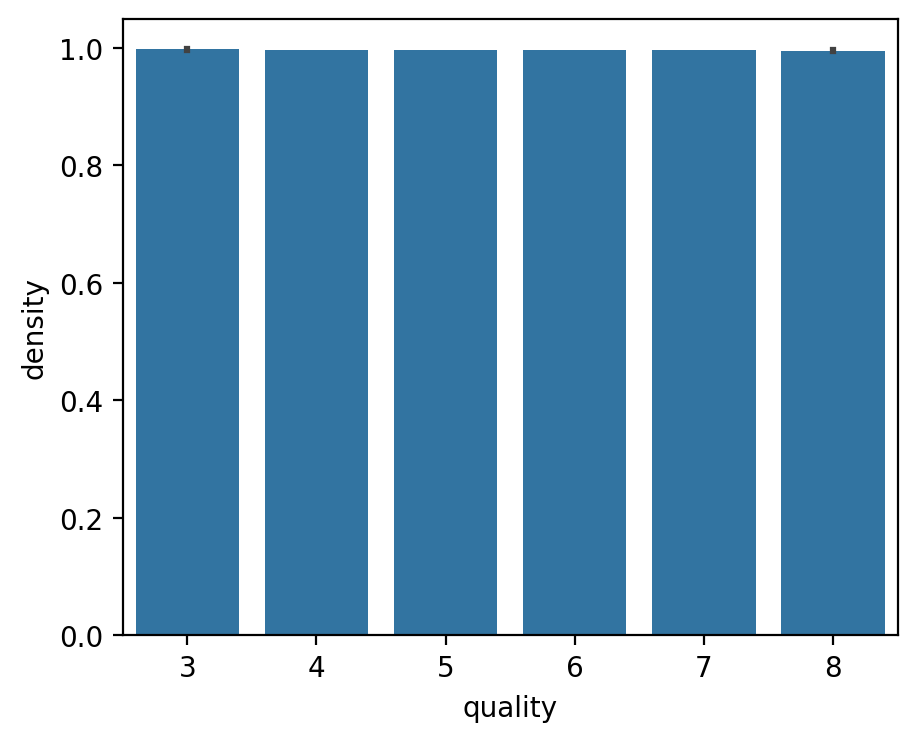

In [ ]:
plt.figure(figsize=(5, 4), dpi=200)
sns.barplot(x=df['quality'], y=df['density'])

На графике видно, что качество вина не зависит от его плотности. Следовательно, определить качество вина по плотности будет проблематично

## Вывод

#### Был взят датасет с качеством вин. Были обработаны отсутствующие значения и заменены на среднее значение по признаку. Далее данные были сгруппированы по различным признакам и затем были сделаны графики зависимости признаков от целевой переменной(качества вина). В них видна определнная зависимость показателей от качества вина, но график зависимости качества вина от плотности показал, что вне зависимости от качества винаЮ плотность будет примерно одинаковая. 